# MNIST with CNN-features

In [27]:
import sys
sys.path.append('/Users/IzmailovPavel/Documents/Education/GPproject/gplib/')
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

% load_ext autoreload
% autoreload 2
% matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
from gplib.gpc import GPCLaplace, GPCSparse
from gplib.optim.methods import *
from gplib.covfun import SE

In [16]:
x_tr = np.load('../../../GPtf/data/mnist/features_tr.npy')
x_te = np.load('../../../GPtf/data/mnist/features_te.npy')

In [5]:
from keras.datasets import mnist

Using TensorFlow backend.


In [17]:
(_, y_tr), (_, y_te) = mnist.load_data()

In [18]:
data_name = 'mnist'

scaler = StandardScaler()
x_tr = scaler.fit_transform(x_tr)
x_te = scaler.transform(x_te)

y_tr = (y_tr %2 == 0).astype(float)
y_te = (y_te %2 == 0).astype(float)

x_tr = (x_tr + 1) / 2
x_te = (x_te + 1) / 2
y_tr = y_tr[:, None]
y_te = y_te[:, None]
y_tr[y_tr == 0] = -1
y_te[y_te == 0] = -1
num, dim = x_tr.shape
print('of objects:', num)
print('of features:', dim)
print(data_name)

of objects: 60000
of features: 64
mnist


In [43]:
ind_num = 500
print('Finding means...')
means = KMeans(n_clusters=ind_num, n_init=3, max_iter=100, random_state=241)
means.fit(x_tr)
inputs = means.cluster_centers_
print('...found')

Finding means...
...found


In [44]:
gp = GPCSparse(SE(np.array([1., .5, .2])), inputs=inputs)

In [45]:
options = {'optimizer': LBFGS(disp=False, maxfun=5), 'maxiter': 5, 'disp':1}
res = gp.fit(x_tr, y_tr, method='JJ', options=options)

Outter iteration 0 :
	parameters: [  7.93559810e-01   1.60303521e+00   6.09410148e-04]
Outter iteration 1 :
	parameters: [ 1.15225056  1.84067033 -0.00424715]
Outter iteration 2 :
	parameters: [  1.34688624e+00   2.05435475e+00  -1.09481693e-03]
Outter iteration 3 :
	parameters: [  1.48167077e+00   2.24188498e+00  -7.06322212e-04]
Outter iteration 4 :
	parameters: [  1.54204052e+00   2.28518768e+00   1.81972687e-03]


In [46]:
y_pred = gp.predict(x_te)

In [47]:
gp.get_quality(y_te, y_pred)

0.90949999999999998

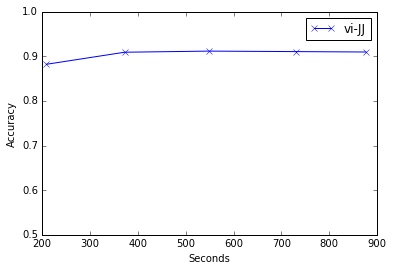

In [48]:
metric = lambda w: gp.get_prediction_quality(x_te, y_te, w)
x_lst, y_lst = res.plot_performance(metric, 't', freq=1)
plt.plot(x_lst, y_lst, '-bx', label='vi-JJ')
plt.ylim([.5, 1.])
plt.legend()
plt.xlabel('Seconds')
plt.ylabel('Accuracy')